In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

import numpy as np
import librosa
import IPython.display as ipd
from matplotlib import pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
device = 'cpu'

In [61]:
from birds_utils import get_pytorch_model_mel, get_bin_audio

In [75]:
window_size = 2048
duration = 5
sr = 22050
n_classes = 264
model_trained = get_pytorch_model_mel(window_size, resnet='resnet18', pretrained=True, n_classes=n_classes, init_fourier=True, train_fourier=False, n_mels=256).to(device)

state_dict = torch.load('./models/model_mel_264_0.536.pth', map_location=torch.device(device))
model_trained.load_state_dict(state_dict)
model_untrained = get_pytorch_model_mel(window_size, resnet='resnet18', pretrained=True, n_classes=n_classes, init_fourier=True, train_fourier=False, n_mels=256).to(device)

Using cache found in /home/usuario/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/usuario/.cache/torch/hub/pytorch_vision_v0.6.0


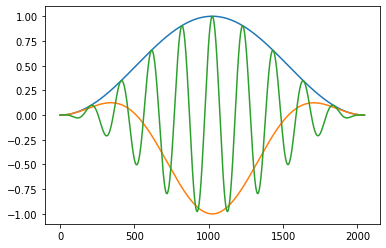

In [58]:
plt.plot(model.cos.weight.data[0, 0, :])
plt.plot(model.cos.weight.data[1, 0, :])
plt.plot(model.cos.weight.data[10, 0, :])

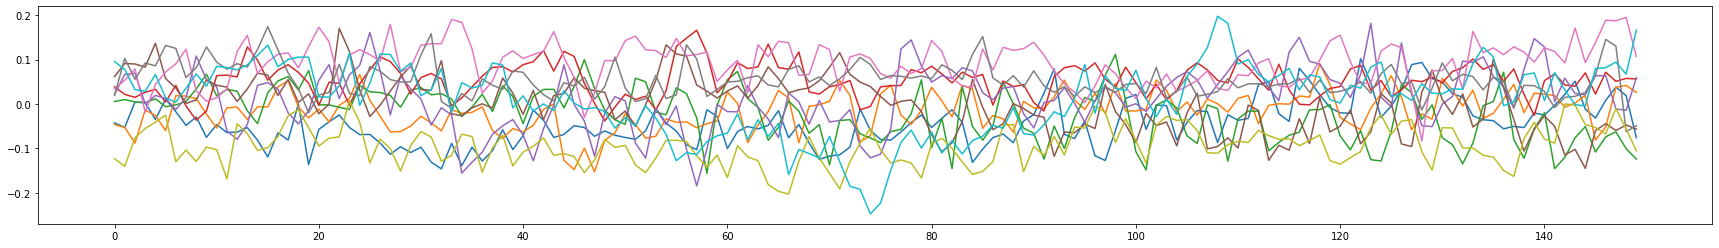

In [59]:
plt.figure(figsize=(30, 4))
for N in range(10):
    plt.plot(model.mel_filter.weight.data[-(N+1), :, 0][-150:] + model.mel_filter.bias.data[-(N+1)])


In [60]:
file_to_test = './dataset/bin_22050_librosa/rewbla/XC173883.mp3.bin'

In [65]:
audio_chunk = get_bin_audio(file_to_test)[:duration*sr]

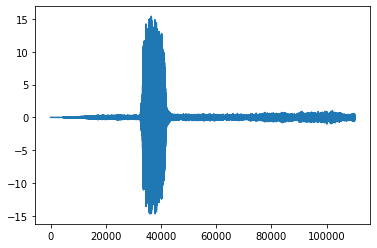

In [66]:
plt.plot(audio_chunk)

In [76]:
mel, pred = model_trained(torch.from_numpy(audio_chunk.reshape(1, 1, -1)).float())

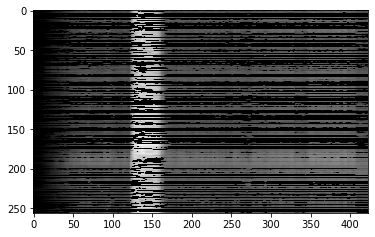

In [189]:
plt.imshow(mel[0].detach(), cmap='gray')

In [78]:
mel_un, pred = model_untrained(torch.from_numpy(audio_chunk.reshape(1, 1, -1)).float())

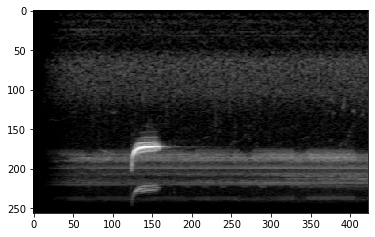

In [80]:
plt.imshow(mel_un[0].detach(), cmap='gray')

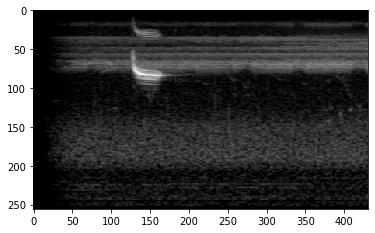

In [203]:
lib_mel = librosa.feature.melspectrogram(audio_chunk, n_mels=256, n_fft=2048, hop_length=256)
plt.imshow(np.flipud(librosa.power_to_db(lib_mel)), cmap='gray')

In [191]:
ipd.Audio(audio_chunk, rate=sr)